In [0]:
%run /Users/pnl0rc8b@emea.royalahold.net/FINALIZED_Notebooks/Functions_Finalized

In [0]:
%run /Users/pnl0rc8b@emea.royalahold.net/FINALIZED_Notebooks/Functions_Tables

#Configureer Parameters

In [0]:
# PARAMETERS
ATTRIBUUT = "ndContainsCocos" # Selecteer Attribuut

Out[41]: ' Plot de distributie van de classes die aanwezig zijn in het DESBETREFFENDE attribuut '

In [0]:
numerieke_features = load_numerical_features(ATTRIBUUT)

Numerieke Features: []

# Load model from database

In [0]:
#dbutils.fs.cp("dbfs:/FileStore/nd_MODELS_publicatie/model_"+str(ATTRIBUUT)+".h5", "file:/FileStore/nd_MODELS_publicatie/model_"+str(ATTRIBUUT)+"_1__LOADED.h5")
from tensorflow import keras
model = keras.models.load_model("/dbfs/FileStore/nd_MODELS/model_"+str(ATTRIBUUT)+".h5")

# Formateer Attribuut

Amount of rows: 34439 Amount of columns: 139
ATTRIBUUT: ndContainsCocos
{'False': 18735, 'EMPTY': 14092, 'True': 1612}

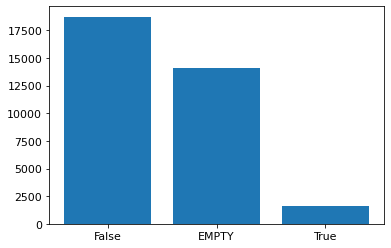

null entries = 0
Shape van dataframe: (23162, 27)
null entries = 683
Vocabular size: 39801.0
Numerical Features: Index([], dtype='object')
Shape Numerical Features: (22479, 0)
Shape Text Features: (22479, 301)
Shape Targets: (22479, 3)
 1/703 [..............................] - ETA: 42s 47/703 [=>............................] - ETA: 0s  94/703 [===>..........................] - ETA: 0s144/703 [=====>........................] - ETA: 0s195/703 [=======>......................] - ETA: 0s238/703 [=========>....................] - ETA: 0s289/703 [===========>..................] - ETA: 0s342/703 [=============>................] - ETA: 0s391/703 [===============>..............] - ETA: 0s441/703 [=================>............] - ETA: 0s489/703 [===================>..........] - ETA: 0s540/703 [======================>.......] - ETA: 0s590/703 [========================>.....] - ETA: 0s640/703 [==========================>...] - ETA: 0s689/703 [============================>.] - ETA: 0s703/703 [==============================] - 1s 1ms/step
 1/703 [..............................] - ETA: 1:27 - loss: 0.0173 - accuracy: 1.0000 46/703 [>.............................] - ETA: 0s - loss: 0.0170 - accuracy: 0.9952  92/703 [==>...........................] - ETA: 0s - loss: 0.0209 - accuracy: 0.9952139/703 [====>.........................] - ETA: 0s - loss: 0.0293 - accuracy: 0.9944186/703 [======>.......................] - ETA: 0s - loss: 0.0306 - accuracy: 0.9936234/703 [========>.....................] - ETA: 0s - loss: 0.0307 - accuracy: 0.9937281/703 [==========>...................] - ETA: 0s - loss: 0.0295 - accuracy: 0.9937329/703 [=============>................] - ETA: 0s - loss: 0.0293 - accuracy: 0.9935377/703 [===============>..............] - ETA: 0s - loss: 0.0303 - accuracy: 0.9933423/703 [=================>............] - ETA: 0s - loss: 0.0301 - accuracy: 0.9931470/703 [===================>..........] - ETA: 0s - loss: 0.0317 - accuracy: 0.9928514/703 [====================>.........] - ETA: 0s - loss: 0.0320 - accuracy: 0.9926561/703 [======================>.......] - ETA: 0s - loss: 0.0318 - accuracy: 0.9925

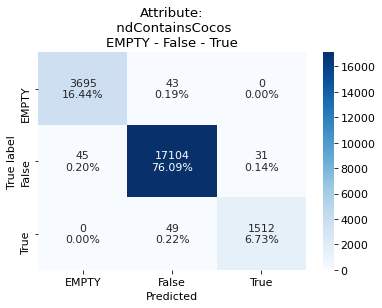

Confusion Matrix:
**************************
 [[ 3695 43 0]
 [ 45 17104 31]
 [ 0 49 1512]] 
**************************

Accuracy: 99.25263579340718
Classification report: precision recall f1-score support

 0 0.99 0.99 0.99 3738
 1 0.99 1.00 1.00 17180
 2 0.98 0.97 0.97 1561

 accuracy 0.99 22479
 macro avg 0.99 0.98 0.99 22479
weighted avg 0.99 0.99 0.99 22479

0

In [0]:
# onderstaande twee parameters, hoeven niet aangepast te worden.
Classes_threshold = 11
Overig_threshold = 150 # Class beneden deze threshold, zal worden toegevoegd aan class: 'overig'

nd_controle = koppel_ndAttributen_new_products(NASA_CONTROLE)
df_geformateerd, multi_label_flag, classes_available = create_overige_class(nd_controle, ATTRIBUUT,Classes_threshold, Overig_threshold)

DF_merged = koppel_preprocessed_text(df_geformateerd, DF_NLP_spark) # Hier moeten we het nieuwe assortiment door de tokenizer laten loopen
DF_merged = fix_empty_fields(DF_merged, ATTRIBUUT)
DF_merged = Correlation_matrix(DF_merged, ATTRIBUUT, show_nan_plot=False, show_correlation_matrix=False)

# Neural network
numerical, text, target, vocab_size = single_prep_controle(numerieke_features, DF_merged, ATTRIBUUT) # Preparation, before training

#Predictions
list_ytest, list_yhat, yhat2 = predictions_2inputs(model, numerical, text, target)
plot_confusion_matrix(DF_merged, confusion_matrix(list_ytest, list_yhat), ATTRIBUUT)
accuracy_report(list_ytest, list_yhat, macro_f1_list=[])
#Predictions to dataframe
controle_tabel = predictions_to_dataframe(DF_merged, ATTRIBUUT, list_ytest, list_yhat)

# Controle Tabellen

In [0]:
equal, unequal = unequal_and_equal_table(controle_tabel, ATTRIBUUT) # Both spark dataframes

In [0]:
display(unequal) # Met deze tabel, kan je inzien welke producten er nog moeten worden gecontroleerd. Dus hier is busines-rules ongelijk aan de voorspellingen van het machine learning model.

gtin,gln,NASA_NR,MERKNAAM,SCHAPSTICKER_OMSCHRIJVING,ASSGROEP_OMSCHRIJVING,Lemmatized,ndContainsCocos,PREDICTED Labels,UnLemmatized
8719326190075,8719333008103,725579,Braxzz,braxzz rebel ipa,Speciaal Bier,alcoholarm ipa 02 braxzz rebel ipa alcoholarme ipa 02,EMPTY,False,alcoholarme ipa 02 braxzz rebel ipa alcoholarme ipa 02
4260380664803,8712423018730,885909,Like meat,likemeat chicken burger,Vegetarisch,vleesvervanger like meat chick burger 180 g,False,EMPTY,vleesvervanger like meat chicken burger 180g
8710400238676,8714252029901,542740,AH,ah sinaasappelsap,Gekoelde sappen,sinaasappelsap concentraat ° pasteuriseren vruchtendrank ah sinaasappel sinaasappel sap persen koelen waarvan toevoegen suiker 000 g per 100 milliliter waarvan toevoegen zout 000 g per 100 milliliter ° rainforest alliance certificeren zien informatie raorg,EMPTY,False,sinaasappelsap concentraat° gepasteuriseerd vruchtendrank ah sinaasappel sinaasappel sap geperst gekoeld waarvan toegevoegde suikers 000g per 100 milliliter waarvan toegevoegd zout 000g per 100 milliliter °rainforest alliance gecertificeerd zie informatie raorg
8711741359181,8711741000007,706506,Fairtrade Original,fto aroma bn,Koffie,branden biologisch koffieboon biologisch koffieboon fairtrad original community coffee sort aroma biologisch koffieboon 500 g fairtrade original biologisch koffieboon community sort aroma 500 g zak,EMPTY,False,gebrande biologische koffiebonen biologische koffiebonen fairtrade original community coffee sort aroma biologische koffiebonen 500 g fairtrade original biologische koffiebonen community sort aroma 500 g zak
8719324872447,8712423015289,619470,Molensteen,molensteen kokosmeel bio,Bakprodukten,biologisch kokosmeel biologisch kokosmeel molensteen bio kokosmeel molensteen biologisch kokosmeel 200 g ingrediënt 100 kokosmeel biologisch oorsprong spoor bevatten glut noot,True,False,biologisch kokosmeel biologisch kokosmeel molensteen bio kokosmeel molensteen biologisch kokosmeel 200g ingrediënten 100 kokosmeel biologische oorsprong sporen bevatten gluten noten
8718906478329,8710589600011,847344,AH,ah sperziebonen,Groentegemak,sperzieboon breken kookgroente ah sperzieboon ah sperzieboon 400 g waarvan toevoegen suiker 000 g per 100 gram waarvan toevoegen zout 000 g per 100 gram,False,EMPTY,sperziebonen gebroken kookgroente ah sperziebonen ah sperziebonen 400 g waarvan toegevoegde suikers 000g per 100 gram waarvan toegevoegd zout 000g per 100 gram
853152006983,8718781030001,705048,Probar,pro bar cr pean bio,Wholefoods,eiwitreep krokant muesli pindakaas stuk chocolade reep probar protein crunch peanut butter chocol 60 gram ingrediënt zilvervliesrijsstroop † pindakaas † 13 puur chocolade † 12 cacaomassa † rietsuiker † cacaoboter † vanilleextract † stuk pinda† 12 krokant muesli† 7 haver† glutenvrij rietsuiker† krokant zilvervliesrijst† zilvervliesrijst† rietsuikerstroop† zeezout persen koolzaadolie† zilvervliesrijsstroop† havermeel† glutenvrij melasse† zeezout krokant stuk sojaeiwit† sojameel† rijstmeel† zonnebloempitten† dadels† dadels† havermeel† glutenvrij haver† glutenvrij havermout† glutenvrij zilvervliesrijsteiwitpoeder† halfzoet chocolade† 35 rietsuiker† cacaomassa† cacaoboter† emulgator zonnebloemlecithine† vanilleextact† lijnzaad† sesamzaad† bevochtigingsmiddel glycerol† pindaextract† zeezout †biologisch ingrediënt allergeen zien vetgedrukt ingrediënt,False,True,eiwitreep krokante muesli pindakaas stukjes chocolade reep probar protein crunch peanut butter chocol 60 gram ingrediënten zilvervliesrijsstroop † pindakaas † 13 pure chocolade † 12 cacaomassa † rietsuiker † cacaoboter † vanilleextract † stukjes pinda† 12 krokante muesli† 7 haver† glutenvrij rietsuiker† krokante zilvervliesrijst† zilvervliesrijst† rietsuikerstroop† zeezout geperste koolzaadolie† zilvervliesrijsstroop† havermeel† glutenvrij melasse† zeezout krokante stukjes sojaeiwit† sojameel† rijstmeel† zonnebloempitten† dadels† dadels† havermeel† glutenvrij haver† glutenvrij havermout† glutenvrij zilvervl

In [0]:
display(equal)

gtin,gln,NASA_NR,MERKNAAM,SCHAPSTICKER_OMSCHRIJVING,ASSGROEP_OMSCHRIJVING,Lemmatized,ndContainsCocos,PREDICTED Labels,UnLemmatized
8718906958746,8713245100009,573724,AH,ah green goodness,Gekoelde sappen,vers groentefruitdrank spinazie appel avocado banaan citroen vers groentesap ah green goodness vers spinazie appel avocado banaan citroen ah green goodness 125ml ingrediënt groente 60 spinazie 15 avocado fruit 18 appel 5 banaan 2 citroen antioxidant ascorbinezuur e300 waarvan toevoegen suiker 000 g per 100 milliliter waarvan toevoegen zout 000 g per 100 milliliter,False,False,verse groentefruitdrank spinazie appel avocado banaan citroen vers groentesap ah green goodness verse spinazie appel avocado banaan citroen ah green goodness 125ml ingrediënten groente 60 spinazie 15 avocado fruit 18 appel 5 banaan 2 citroen antioxidant ascorbinezuur e300 waarvan toegevoegde suikers 000g per 100 milliliter waarvan toegevoegd zout 000g per 100 milliliter
8718481542149,8718481540008,725543,Uggo,uggo crazy g icetea,Internationale dranken,frisdrank tutti frutti smaak groen thee extract ice tea uggo crazy green ice tea 500 ml ingrediënt water suiker voedingszuur citroenzuur zuurteregelaar e331 iii stabilisator e414 e445 groen theeextract kleuren levensmiddelen concentraat zwart bes wortel aromas,False,False,frisdrank tutti frutti smaak groene thee extract ice tea uggo crazy green ice tea 500 ml ingrediënten water suiker voedingszuur citroenzuur zuurteregelaar e331 iii stabilisatoren e414 e445 groene theeextract kleurende levensmiddelen concentraten zwarte bessen wortel aromas
8410026416556,8714253049021,579653,Federico Paternina,federico paternina blanc,Witte wijn & rose,wine wht white wine federico paternina banda veren rioja paternina rioja blanco,EMPTY,EMPTY,wine wht white wine federico paternina banda verde rioja paternina rioja blanco
8719326404769,8719333008103,721804,Brouwery Voorschoten,voorschotens pale ale,Speciaal Bier,bier cat 1 bier voorschoten pale ale bier 33 centiliter brouwerij voorschoten voorschoten pale ale bier 33 centiliter ingrediënt water pale al mout munchen mout cascade hop simcoe hop citra hop gist,False,False,bier cat 1 bier voorschotens pale ale bier 33 centiliter brouwerij voorschoten voorschotens pale ale bier 33 centiliter ingrediënten water pale ale mout munchener mout cascade hop simcoe hop citra hop gist
8718906616448,8710765271257,849864,AH,ah pizza salami,Vleeswaren ZB,roken salami pizza salami ah pizza salami pizzasalami 125 g ingrediënt varkensvlees zout specerij rodebietensapconcentraat oregano glucosestroop dextrose antioxidant natriumascorbaat e301 conserveermiddel natriumnitriet e250 rook waarvan toevoegen suiker 000 g per 100 gram waarvan toevoegen zout 318 g per 100 gram 100 g pizzasalami 117 g varkensvlees gebruiken,False,False,gerookte salami pizza salami ah pizza salami pizzasalami 125g ingrediënten varkensvlees zout specerijen rodebietensapconcentraat oregano glucosestroop dextrose antioxidant natriumascorbaat e301 conserveermiddel natriumnitriet e250 rook waarvan toegevoegde suikers 000g per 100 gram waarvan toegevoegd zout 318g per 100 gram 100 g pizzasalami 117 g varkensvlees gebruikt
3760179750096,8714253049021,795377,Vermeersch,vermeer gigon rd ds bel,B Wijn & Gedestilleerd,wine rd red wine vermeersch victory gigondas vermeersch gigondas rouge 75 cl,EMPTY,EMPTY,wine rd red wine vermeersch victory gigondas vermeersch gigondas rouge 75 cl
5410146473340,5410146000003,659988,Danio,danio nectarine framb bel,B zuivel,vers kaasspecialiteit nietopgeklopt mager danio mg 180 framboosnectarin ingrediënt mager vers kaas 40 melk afromen melk vloeibaar suiker sacharos 85 room melk glucosefructostroop nectarine 5 framboos 4 verdikkingsmiddel modificeren tapioca maïszetmeel pectin guargom melkeiwiten gelatine aromas wortelconcentraat zuurteregelaaar citroenzuur calciumcitraat natriumcitraat melkferment bevatten spoor glutenbevattenen graan ei noot,False,False,verse kaasspecialiteit nietopgeklopt mager danio